<a href="https://colab.research.google.com/github/MariiAna27/Monitor-China_basecod/blob/main/C%C3%B3pia_de_ResultadoAS_final_Conflito_ir%C3%A3_israel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # importarção das bibliotecas e pacotes necessários
import pandas as pd

import matplotlib.pyplot as plt

import string
import re

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from google.colab import files
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


!pip install leia-br
from LeIA import SentimentIntensityAnalyzer

nltk.download('all')
nltk.download('stopwords')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.0/130.0 kB 2.6 MB/s eta 0:00:00


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:

# Upload do arquivo CSV
uploaded = files.upload()

# Lê o arquivo CSV
nome_do_arquivo = next(iter(uploaded))
df = pd.read_csv(nome_do_arquivo)

# Renomeando coluna com erro de digitação
df = df.rename(columns={'tweet ': 'tweet'})
df['tweet'] = df['tweet'].astype(str)

# Mostra as primeiras linhas
df.head()



Saving ULTIMATECLASSIFICADOR.csv to ULTIMATECLASSIFICADOR.csv


,id,tweet,viés político
0,@marianatimes,Foda-se o Irã\nFoda-se o Paquistão\nFoda-se a ...,contra-irã
1,@LavenderNRed,Meu G-d . Israel bombardeou deliberadamente a ...,contra-israel
2,@EricS2075,As ações de Israel contra o Irã têm sido efica...,contra-irã
3,@SFrydlewsky,Israel e Hamas estão caminhando para um acordo...,neutro
4,@Saqib_sqb,Há 2 milhões de cidadãos com dupla nacionalida...,neutro


In [ ]:
def pre_processamento(texto):

    # seleciona apenas letras e coloca todas em minúsculo
    letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    # remove stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    sem_stopwords = [w for w in letras_min if w not in stop]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

In [ ]:
df['tokens'] = df['tweet'].apply(pre_processamento)
df.head()

,id,tweet,viés político,tokens
0,@marianatimes,Foda-se o Irã\nFoda-se o Paquistão\nFoda-se a ...,contra-irã,foda irã foda paquistão foda palestina vida lo...
1,@LavenderNRed,Meu G-d . Israel bombardeou deliberadamente a ...,contra-israel,g d israel bombardeou deliberadamente seção tr...
2,@EricS2075,As ações de Israel contra o Irã têm sido efica...,contra-irã,ações israel contra irã têm sido eficazes enta...
3,@SFrydlewsky,Israel e Hamas estão caminhando para um acordo...,neutro,israel hamas caminhando acordo cessar fogo apó...
4,@Saqib_sqb,Há 2 milhões de cidadãos com dupla nacionalida...,neutro,milhões cidadãos dupla nacionalidade russo isr...


🔠 Palavras mais frequentes:
[('israel', 1426), ('irã', 1422), ('bombardeio', 412), ('guerra', 297), ('eua', 294), ('conflito', 273), ('trump', 241), ('bombardear', 186), ('bombardeando', 178), ('gaza', 161)]


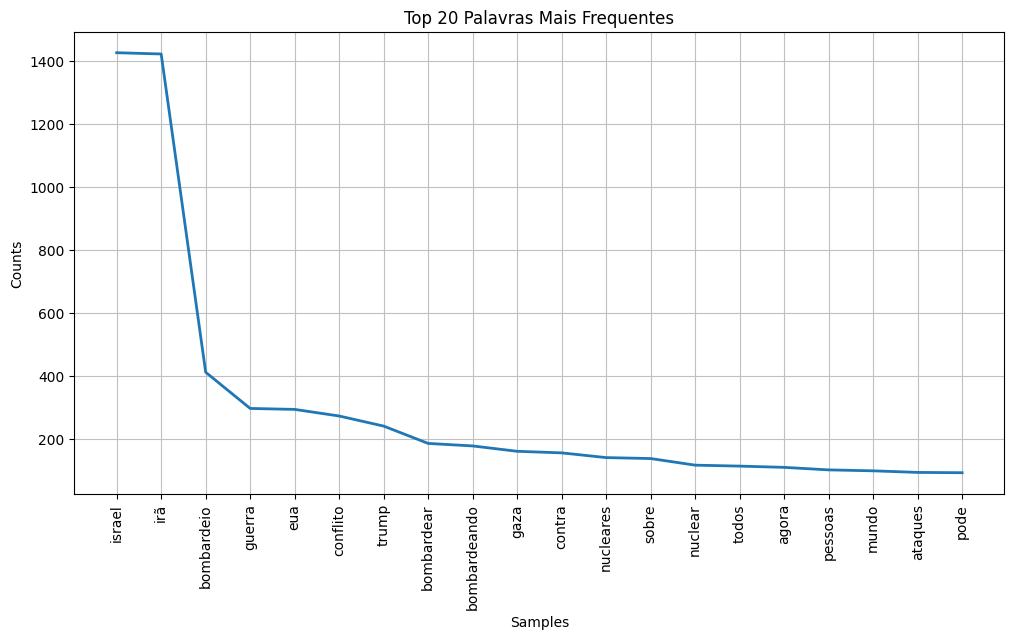

In [ ]:
#criando gráfico com as 20 palavras mais frequentes nos textos
all_words = [word for tokens in df['tokens'] for word in tokens.split(" ")]

freq_dist = FreqDist(all_words)

print("🔠 Palavras mais frequentes:")
print(freq_dist.most_common(10))

# Plotagem do gráfico
plt.figure(figsize=(12, 6))
freq_dist.plot(20, title='Top 20 Palavras Mais Frequentes', cumulative=False)
plt.show()

In [ ]:
#Analisando a intensidade dos sentimentos dos textos
sia = SentimentIntensityAnalyzer()

def get_compound_Sentimento(texto):
  sentimento = sia.polarity_scores(texto)
  return sentimento['compound']

def get_neg_Sentimento(texto):
  sentimento = sia.polarity_scores(texto)
  return sentimento['neg']

def get_neu_Sentimento(texto):
  sentimento = sia.polarity_scores(texto)
  return sentimento['neu']

def get_pos_Sentimento(texto):
  sentimento = sia.polarity_scores(texto)
  return sentimento['pos']

def get_all_Sentimento(texto):
  sentimento = sia.polarity_scores(texto)
  return sentimento

In [ ]:
#aplicando analisador de sentimentos
df['sentimento'] = df['tokens'].apply(get_compound_Sentimento)
df['negativo']  = df['tokens'].apply(get_neg_Sentimento)
df['positivo']  = df['tokens'].apply(get_pos_Sentimento)
df['neutro']    = df['tokens'].apply(get_neu_Sentimento)
df.head()

,id,tweet,viés político,tokens,sentimento,negativo,positivo,neutro
0,@marianatimes,Foda-se o Irã\nFoda-se o Paquistão\nFoda-se a ...,contra-irã,foda irã foda paquistão foda palestina vida lo...,-0.8519,0.608,0.000,0.392
1,@LavenderNRed,Meu G-d . Israel bombardeou deliberadamente a ...,contra-israel,g d israel bombardeou deliberadamente seção tr...,-0.8074,0.291,0.083,0.627
2,@EricS2075,As ações de Israel contra o Irã têm sido efica...,contra-irã,ações israel contra irã têm sido eficazes enta...,-0.4588,0.100,0.000,0.900
3,@SFrydlewsky,Israel e Hamas estão caminhando para um acordo...,neutro,israel hamas caminhando acordo cessar fogo apó...,-0.3818,0.276,0.152,0.571
4,@Saqib_sqb,Há 2 milhões de cidadãos com dupla nacionalida...,neutro,milhões cidadãos dupla nacionalidade russo isr...,0.4588,0.000,0.167,0.833


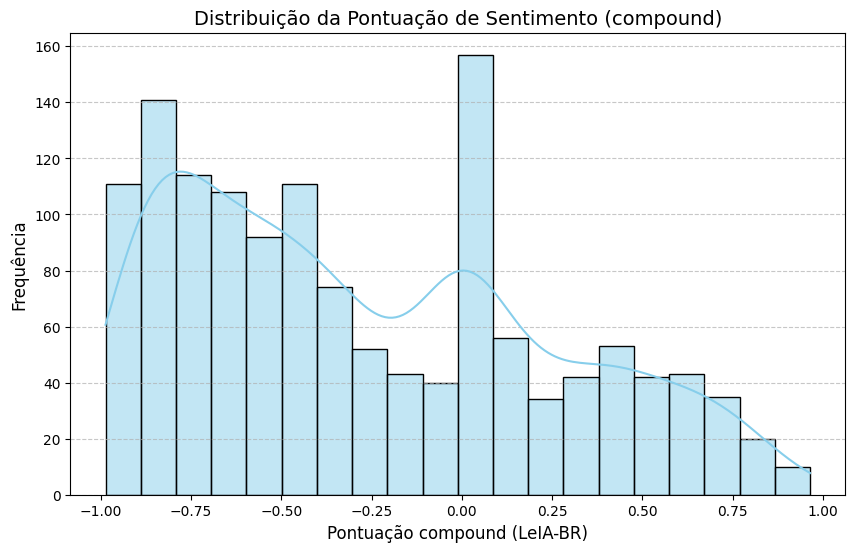

In [ ]:
#criando gráfico para vizualizar a distribuição dos sentimentos

plt.figure(figsize=(10, 6))
sns.histplot(df['sentimento'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribuição da Pontuação de Sentimento (compound)', fontsize=14)
plt.xlabel('Pontuação compound (LeIA-BR)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
#vizualizando no dataframe a atribuição de valores
df['sentimento'] = df['tokens'].apply(get_compound_Sentimento)
df['negativo']  = df['tokens'].apply(get_neg_Sentimento)
df['positivo']  = df['tokens'].apply(get_pos_Sentimento)
df['neutro']    = df['tokens'].apply(get_neu_Sentimento)
df.head()

,id,tweet,viés político,tokens,sentimento,negativo,positivo,neutro
0,@marianatimes,Foda-se o Irã\nFoda-se o Paquistão\nFoda-se a ...,contra-irã,foda irã foda paquistão foda palestina vida lo...,-0.8519,0.608,0.000,0.392
1,@LavenderNRed,Meu G-d . Israel bombardeou deliberadamente a ...,contra-israel,g d israel bombardeou deliberadamente seção tr...,-0.8074,0.291,0.083,0.627
2,@EricS2075,As ações de Israel contra o Irã têm sido efica...,contra-irã,ações israel contra irã têm sido eficazes enta...,-0.4588,0.100,0.000,0.900
3,@SFrydlewsky,Israel e Hamas estão caminhando para um acordo...,neutro,israel hamas caminhando acordo cessar fogo apó...,-0.3818,0.276,0.152,0.571
4,@Saqib_sqb,Há 2 milhões de cidadãos com dupla nacionalida...,neutro,milhões cidadãos dupla nacionalidade russo isr...,0.4588,0.000,0.167,0.833


In [ ]:
import pandas as pd

# porcentagem dos sentimentos
n_neg = len(df[(df['sentimento'] <= -0.5) & (df['sentimento'] >= -1.0)])
n_neu = len(df[(df['sentimento'] > -0.5) & (df['sentimento'] < 0.5)])
n_pos = len(df[(df['sentimento'] >= 0.5) & (df['sentimento'] <= 1.0)])

print(f"Negativos: {n_neg} ({n_neg/len(df)*100:.1f}%)")
print(f"Neutros: {n_neu} ({n_neu/len(df)*100:.1f}%)")
print(f"Positivos: {n_pos} ({n_pos/len(df)*100:.1f}%)")

Negativos: 566 (41.1%)
Neutros: 680 (49.3%)
Positivos: 132 (9.6%)


**RANDOM FORREST**

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#limpando o texto
def clean_text(text):
    if not isinstance(text, str):
        return ""
    # Remove URLs, menções e hashtags
    text = re.sub(r'http\S+|@\w+|#\w+', '', text)
    # Remove pontuações
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Converte para minúsculas
    text = text.lower()
    # Remove números
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('portuguese'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [ ]:
df['cleaned_tweet'] = df['tweet'].apply(clean_text)

# Separar dados rotulados e não rotulados
df_labeled = df[df['viés político'].notna()].copy()
df_unlabeled = df[df['viés político'].isna()].copy()


In [ ]:
#transformar textos (tweets) em vetores numéricos
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_labeled['cleaned_tweet'])
y = df_labeled['viés político']

In [ ]:
#dividir os dados em conjuntos para treinamento
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#Criando o modelo random forrest e treinando ele para uso
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
#checando acurácia
y_pred = rf_model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.5185185185185185

Relatório de Classificação:
               precision    recall  f1-score   support

   contra-irã       0.55      0.67      0.60         9
contra-israel       0.43      0.43      0.43         7
       neutro       0.56      0.50      0.53        10
      neutro        0.00      0.00      0.00         1

     accuracy                           0.52        27
    macro avg       0.38      0.40      0.39        27
 weighted avg       0.50      0.52      0.51        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
if not df_unlabeled.empty:
    X_unlabeled = vectorizer.transform(df_unlabeled['cleaned_tweet'])
    rf_predictions = rf_model.predict(X_unlabeled)
    df_unlabeled['viés político (RF)'] = rf_predictions

In [ ]:
df_final_rf = pd.concat([df_labeled, df_unlabeled], ignore_index=True)

# Exportar resultados
output_filename_rf = 'tweets_classificados_rf.csv'
df_final_rf.to_csv(output_filename_rf, index=False, encoding='utf-8-sig')

print("\nResumo da classificação por Random Forest:")
print(df_final_rf['viés político (RF)'].value_counts())



Resumo da classificação por Random Forest:
viés político (RF)
contra-israel    534
contra-irã       386
neutro           324
Name: count, dtype: int64


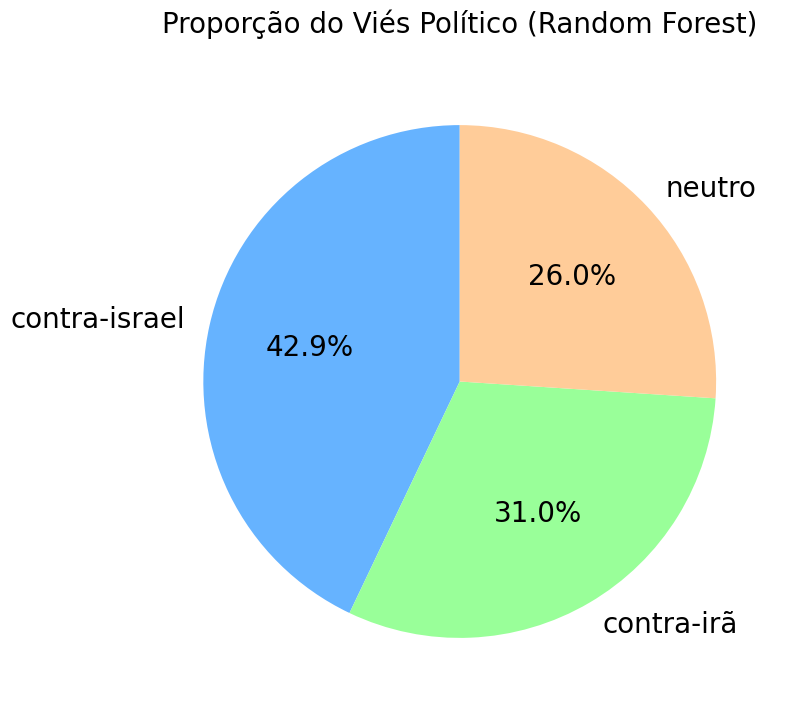

In [ ]:
# Configurações do gráfico de pizza
contagem = df_final_rf['viés político (RF)'].value_counts()
plt.figure(figsize=(8, 8))
contagem.plot(kind='pie', autopct='%1.1f%%', startangle=90,
              colors=['#66b3ff', '#99ff99', '#ffcc99'], fontsize=20)

plt.title("Proporção do Viés Político (Random Forest)", fontsize=20, pad=20)
plt.ylabel("")  # Remove o rótulo do eixo Y
plt.tight_layout()
plt.savefig('proporcao_viés_rf.png', dpi=300)
plt.show()

In [ ]:
#exibir todos os tweets classificados como "contra-israel" para conferir se está coeso
pd.set_option('display.max_colwidth', None)
print( df_final_rf[df_final_rf['viés político (RF)'] == 'contra-israel']['cleaned_tweet']  )

135                                                                                                                                                                        israel semanas destruído mísseis balísticoshipersônicos irã guerra próprio provocou parem falar mudança regime irã eua deveriam vez disso pressionar mudança regime israel economizaria dinheiro eua gastariam economia pobres americanos
140                                                                                                                                                                                                                                                                                  irã certamente apressará obter arma nuclear deve obtêla única maneira impedir eua israel bombardeiem todos países oriente médio
141                                                                                                                                                                                           

In [ ]:
#levantar os features mais relevantes
feature_names = vectorizer.get_feature_names_out()
importances = rf_model.feature_importances_
top_features = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]
print("\nTop 20 features mais importantes:")
print(top_features)


Top 20 features mais importantes:
gaza                0.059865
pessoas             0.057454
irã                 0.053764
israel              0.048469
síria               0.044367
líbano              0.040619
prisão              0.035621
iêmen               0.028277
alguns              0.018481
guerra              0.016706
aceitar             0.016671
eua                 0.016638
iraque              0.015308
mundo               0.014862
terrorista          0.012999
primeiroministro    0.012063
cisjordânia         0.011995
bombardeio          0.011644
bombardeou          0.011105
destruir            0.011056
dtype: float64


In [ ]:
import pandas as pd

# Supondo que 'df' tenha uma coluna 'compound':
n_neg = len(df[(df['compound'] <= -0.5) & (df['compound'] >= -1.0)])
n_neu = len(df[(df['compound'] > -0.5) & (df['compound'] < 0.5)])
n_pos = len(df[(df['compound'] >= 0.5) & (df['compound'] <= 1.0)])

print(f"Negativos: {n_neg} ({n_neg/len(df)*100:.1f}%)")
print(f"Neutros: {n_neu} ({n_neu/len(df)*100:.1f}%)")
print(f"Positivos: {n_pos} ({n_pos/len(df)*100:.1f}%)")

KeyboardInterrupt: 

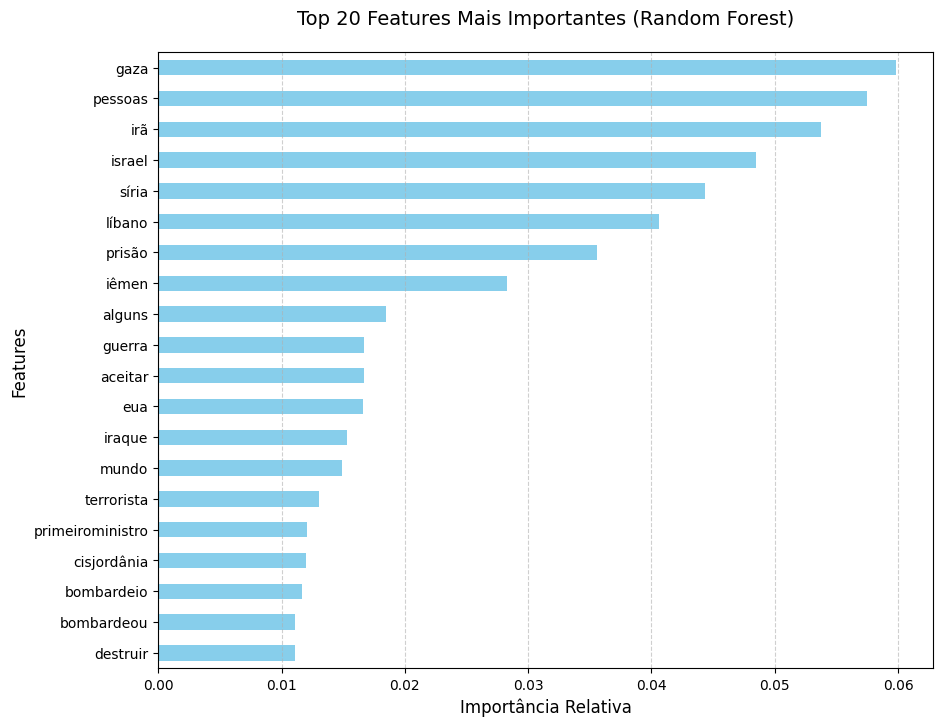

In [ ]:
#plotando um gráfico dos features mais relevantes
plt.figure(figsize=(10, 8))
top_features.sort_values().plot(kind='barh', color='skyblue')  # Barras horizontais
plt.title('Top 20 Features Mais Importantes (Random Forest)', fontsize=14, pad=20)
plt.xlabel('Importância Relativa', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
#fazendo matriz de confusão
y_ori = y
y_pred = rf_model.predict(X)
cm = confusion_matrix(y_ori, y_pred)
classes = y_test.unique()

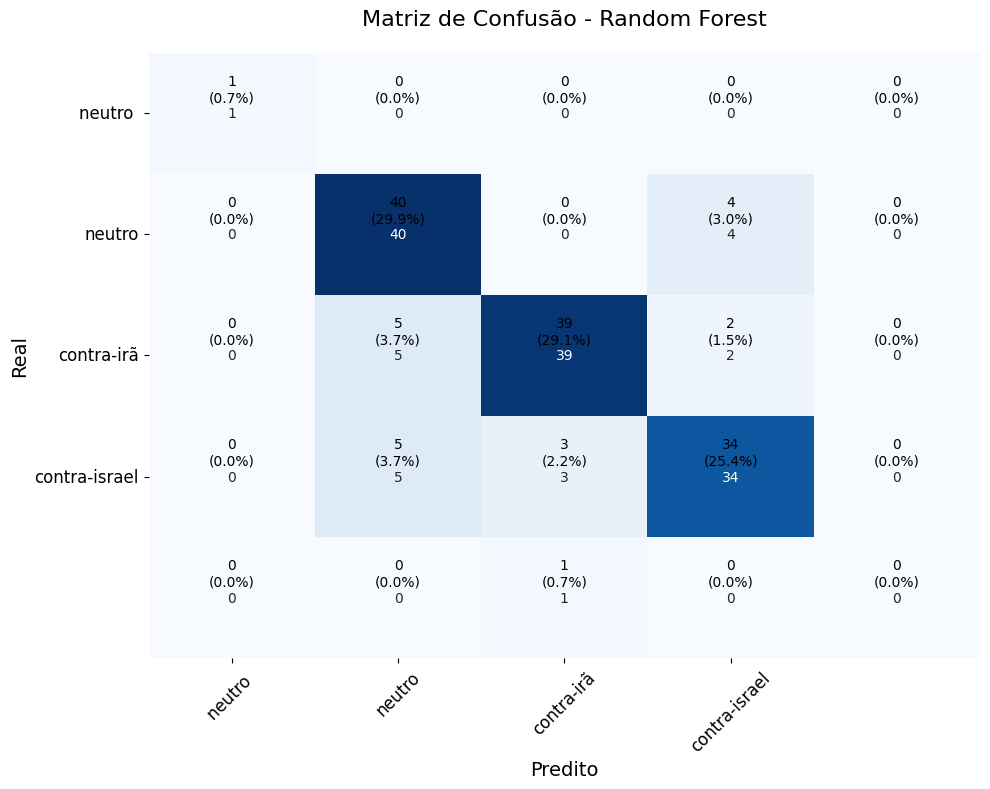

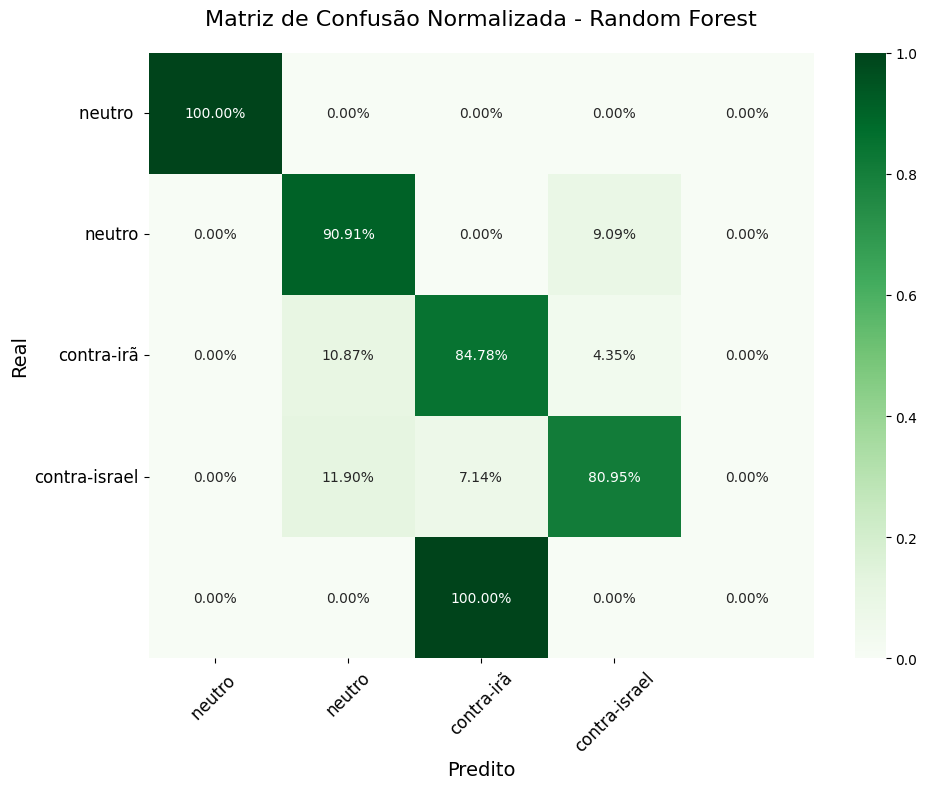

In [ ]:
plt.figure(figsize=(10, 8))

# Plotar heatmap
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=classes,
            yticklabels=classes,
            cbar=False)

# Adicionar rótulos e título
plt.title('Matriz de Confusão - Random Forest', fontsize=16, pad=20)
plt.xlabel('Predito', fontsize=14)
plt.ylabel('Real', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

total = cm.sum()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j+0.5, i+0.3, f"{cm[i, j]}\n({cm[i, j]/total:.1%})",
                 ha='center', va='center', color='black', fontsize=10)

# Mostrar a plotagem
plt.tight_layout()
plt.savefig('matriz_confusao_rf.png', dpi=300)
plt.show()

plt.figure(figsize=(10, 8))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm,
            annot=True,
            fmt='.2%',
            cmap='Greens',
            xticklabels=classes,
            yticklabels=classes)

plt.title('Matriz de Confusão Normalizada - Random Forest', fontsize=16, pad=20)
plt.xlabel('Predito', fontsize=14)
plt.ylabel('Real', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.savefig('matriz_confusao_normalizada_rf.png', dpi=300)
plt.show()